In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 200
import seaborn as sns

In [8]:
##### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Inline plotting
%matplotlib inline

In [9]:
from pathlib import Path

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
PROJECT_DIR = Path.cwd()
DATA_DIR = PROJECT_DIR / 'data'

In [12]:
df=pd.read_csv(DATA_DIR / 'beer_data_set.csv')
df.head(1)

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111


In [13]:
df[['Description']]

,Description
0,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t"
1,"Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t"
2,"Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t"
3,Notes:
4,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t"
...,...
5553,Notes:
5554,"Notes:This is the forty-fifth annual Our Special Ale from the brewers at Anchor. This ale, made with natural flavors, is sold only from early November to mid-January. Its recipe and hand-drawn tree change every year, but the intent with which we offer it remains the same: joy and celebration of the newness of life. Since ancient times, trees have symbolized the winter solstice when the earth, with its seasons, appears born anew. This year's tree is a western arborvitae (tree of life), an evergreen conifer native to Northern California.\t"
5555,Notes:
5556,"Notes:Chanukah Beer pours a rich crystal clear chestnut to ruby color with a light creamy head. The aroma and flavors lean toward a robust winter warmer, though brewed without any spices. Just all malt and hop goodness! Light caramel and toasty nuttiness as well as a hint of sweeter chocolate are rounded out by a healthy dose of European Noble and classic American new school hops. With 8 malts, 8 hops and 8% alcohol, this beer is real wonder with so many elements blending to create balanced and yet still distinct flavors. Hanukkah Beer is brewed as a celebration offering and sure to light up your holiday season. L'Chaim!\t"


In [14]:
df[['Style','Description']]

,Style,Description
0,Altbier,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t"
1,Altbier,"Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t"
2,Altbier,"Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t"
3,Altbier,Notes:
4,Altbier,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t"
...,...,...
5553,Winter Warmer,Notes:
5554,Winter Warmer,"Notes:This is the forty-fifth annual Our Special Ale from the brewers at Anchor. This ale, made with natural flavors, is sold only from early November to mid-January. Its recipe and hand-drawn tree change every year, but the intent with which we offer it remains the same: joy and celebration of the newness of life. Since ancient times, trees have symbolized the winter solstice when the earth, with its seasons, appears born anew. This year's tree is a western arborvitae (tree of life), an evergreen conifer native to Northern California.\t"
5555,Winter Warmer,Notes:
5556,Winter Warmer,"Notes:Chanukah Beer pours a rich crystal clear chestnut to ruby color with a light creamy head. The aroma and flavors lean toward a robust winter warmer, though brewed without any spices. Just all malt and hop goodness! Light caramel and toasty nuttiness as well as a hint of sweeter chocolate are rounded out by a healthy dose of European Noble and classic American new school hops. With 8 malts, 8 hops and 8% alcohol, this beer is real wonder with so many elements blending to create balanced and yet still distinct flavors. Hanukkah Beer is brewed as a celebration offering and sure to light up your holiday season. L'Chaim!\t"


In [15]:
df_details=df['Style']+' '+df['Description']
df_details

NumExpr defaulting to 4 threads.


0       Altbier Notes:Richly malty and long on the pal...
1       Altbier Notes:This malty, full-bodied double a...
2       Altbier Notes:Long Trail Ale is a full-bodied ...
3                                          Altbier Notes:
4       Altbier Notes:Just cause it's dark and German ...
                              ...                        
5553                                 Winter Warmer Notes:
5554    Winter Warmer Notes:This is the forty-fifth an...
5555                                 Winter Warmer Notes:
5556    Winter Warmer Notes:Chanukah Beer pours a rich...
5557    Winter Warmer Notes:The essence of Christmas i...
Length: 5558, dtype: object

In [16]:
#Convert text to vector

vectorizer= TfidfVectorizer()
X=vectorizer.fit_transform(df_details)

In [17]:
print(X)

  (0, 1484)	0.1597368955213197
  (0, 13456)	0.17328908637325183
  (0, 8730)	0.35551699646605633
  (0, 1675)	0.08298481000493439
  (0, 12009)	0.1310203401086031
  (0, 972)	0.28079163195985857
  (0, 3085)	0.21963801517347956
  (0, 1005)	0.16926620904232537
  (0, 1650)	0.23497398448450782
  (0, 12466)	0.09542907795536898
  (0, 7851)	0.19264496315388877
  (0, 12572)	0.09341112767549023
  (0, 1450)	0.37242692691056006
  (0, 6390)	0.13720509036002806
  (0, 4598)	0.23057992207138495
  (0, 7104)	0.1771585504228139
  (0, 13638)	0.07937114130579749
  (0, 9151)	0.19264496315388877
  (0, 12425)	0.07832914709110336
  (0, 8929)	0.13358862703857965
  (0, 7674)	0.19833402231585284
  (0, 1074)	0.07131634861891063
  (0, 7889)	0.17173468210766285
  (0, 10553)	0.29436337967967724
  (0, 8736)	0.04172002720801788
  :	:
  (5557, 11689)	0.1591192966581711
  (5557, 4699)	0.2073144248004006
  (5557, 11003)	0.15829469635066845
  (5557, 2884)	0.3713952200861874
  (5557, 2657)	0.1761518175201727
  (5557, 8878)	0.1

In [18]:
#Matrix column names
vectorizer.get_feature_names_out()

array(['000', '000th', '003', ..., 'ﬂavor', 'ﬂavors', 'ﬂoral'],
      dtype=object)

In [19]:
X.shape

(5558, 13892)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
#Conver my array into a matrix
#Todense() is useful to get a matrix
matrix=X.todense()

In [22]:
#Convert my matrix into a DF
df_matrix=pd.DataFrame(matrix,columns=vectorizer.get_feature_names_out())

In [23]:
matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
df_matrix

,000,000th,003,004,005,007,010ibu,012,02,03,...,домашний,квас,секрет,семейный,ﬁne,ﬁnish,ﬂagship,ﬂavor,ﬂavors,ﬂoral
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_matrix.shape

(5558, 13892)

In [26]:
from scipy.sparse import csr_matrix
import numpy as np

In [27]:
y=input('Which kind of beer would you like to drink?:')
y

Which kind of beer would you like to drink?:I want a fruity beer


'I want a fruity beer'

In [28]:
def get_similarities(X,y):
    vectorized_text = vectorizer.transform([y])
    similarities = cosine_similarity(X, vectorized_text)[:,0]
    return similarities

In [29]:
similarities=get_similarities(X,y)
index_top_bier = np.argmax(similarities)
print(f'I recommend you take beer {index_top_bier}')

I recommend you take beer 2980


In [30]:
df_details.iloc[index_top_bier]

'Low Alcohol Beer Notes:Our flavorful non-alcoholic beer for those moments when you want the taste of America’ best tasting beer without the alcohol content.\t'

#### Many of our descriptions have a short length and this is due to a lack of information in that field. They display the message ''Notes:" . They should be counted as null values because they don't provide any value to our model.

<AxesSubplot:xlabel='Description', ylabel='Count'>

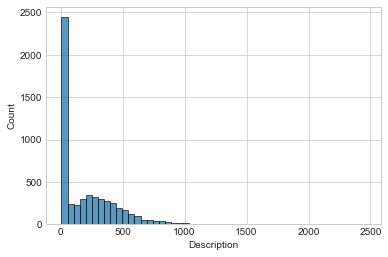

In [31]:
sns.histplot(df['Description'].str.len(),bins=50)

In [32]:
df['Description'].str.len().value_counts(ascending=False)

6       2196
13        27
270       14
359       12
285       12
        ... 
118        1
90         1
58         1
18         1
2043       1
Name: Description, Length: 832, dtype: int64

In [35]:
df[df['Description'].str.len()==6]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
6,Sticke,257,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,6.0,4.10,25,50,...,45,13,46,62,25,1,34,60,4,103
8,Southampton Altbier,259,Altbier,8,Southampton Publick House,Notes:,5.0,3.60,25,50,...,49,5,37,73,22,0,21,37,4,98
10,Organic Münster Alt,261,Altbier,8,Brauerei Pinkus Mueller,Notes:,5.1,3.70,25,50,...,31,5,35,50,55,5,52,66,8,77
20,Alt-eration Ale,271,Altbier,8,Hops & Grain Brewing,Notes:,5.0,3.81,25,50,...,43,3,54,54,7,0,10,60,9,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,Winter Warmer,690,Winter Warmer,17,Rahr & Sons Brewing Company,Notes:,8.5,3.76,35,50,...,67,31,46,67,11,0,24,24,28,100
5548,Young's Winter Warmer,691,Winter Warmer,17,Eagle Brewery,Notes:,5.0,3.55,35,50,...,67,17,28,73,19,0,19,32,43,100
5550,Winter Shredder,693,Winter Warmer,17,Cisco Brewers Inc.,Notes:,8.8,3.38,35,50,...,37,24,35,46,19,0,23,45,67,74
5553,Red Nose Winter Ale,696,Winter Warmer,17,Natty Greene's Pub & Brewing Co.,Notes:,6.8,3.59,35,50,...,44,24,19,52,21,0,26,21,96,77


#### I will delete those rows of my DataFrame

In [36]:
df.drop(df.index[(df['Description'].str.len()==6)],axis=0,inplace=True)

### The new dataframe has 3362 rows

In [37]:
len(df)

3362

<AxesSubplot:xlabel='Description', ylabel='Count'>

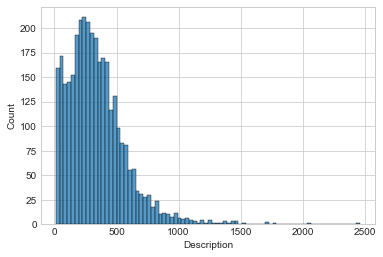

In [38]:
sns.histplot(df['Description'].str.len(),bins=80)

In [39]:
df['Description'].str.len().value_counts(ascending=False)

13      27
270     14
251     12
359     12
285     12
        ..
1054     1
1074     1
1078     1
1102     1
2043     1
Name: Description, Length: 831, dtype: int64

In [40]:
y=input('Which kind of beer would you like to drink?:')
y

Which kind of beer would you like to drink?:Me loves fruity beers!


'Me loves fruity beers!'

In [41]:
import nltk

In [42]:
from nltk.stem import WordNetLemmatizer

In [43]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [44]:
from nltk.stem.porter import PorterStemmer

In [45]:
lemmatizer = WordNetLemmatizer()

In [63]:
def normalize_text(y):
    normalized_y=nltk.word_tokenize(y)
    normalized_y=[lemmatizer.lemmatize(word) for word in normalized_y]
    sentence= ' '.join(normalized_y)
    return sentence

In [65]:
normalize_text(y)

'Me love fruity beer !'

In [51]:
################

In [52]:
df_details

0       Altbier Notes:Richly malty and long on the pal...
1       Altbier Notes:This malty, full-bodied double a...
2       Altbier Notes:Long Trail Ale is a full-bodied ...
3                                          Altbier Notes:
4       Altbier Notes:Just cause it's dark and German ...
                              ...                        
5553                                 Winter Warmer Notes:
5554    Winter Warmer Notes:This is the forty-fifth an...
5555                                 Winter Warmer Notes:
5556    Winter Warmer Notes:Chanukah Beer pours a rich...
5557    Winter Warmer Notes:The essence of Christmas i...
Length: 5558, dtype: object

In [ ]:
#Transforming my Serie into a normalized Serie with my 'normalize_text()' function.

In [70]:
for x in range(len(df_details)):
    df_details[x]=normalize_text(df_details[x])

In [71]:
df_details

0       Altbier Notes : Richly malty and long on the p...
1       Altbier Notes : This malty , full-bodied doubl...
2       Altbier Notes : Long Trail Ale is a full-bodie...
3                                         Altbier Notes :
4       Altbier Notes : Just cause it 's dark and Germ...
                              ...                        
5553                                Winter Warmer Notes :
5554    Winter Warmer Notes : This is the forty-fifth ...
5555                                Winter Warmer Notes :
5556    Winter Warmer Notes : Chanukah Beer pours a ri...
5557    Winter Warmer Notes : The essence of Christmas...
Length: 5558, dtype: object

In [72]:
vectorizer= TfidfVectorizer()
X=vectorizer.fit_transform(df_details)

In [73]:
print(X)

  (0, 1446)	0.16092057872047874
  (0, 12719)	0.17439629251142022
  (0, 8279)	0.3581514504183443
  (0, 1621)	0.08221948690353649
  (0, 11349)	0.1305990681702592
  (0, 958)	0.282872355615659
  (0, 2948)	0.22126557797047147
  (0, 989)	0.1705205064116016
  (0, 1597)	0.23671518996346771
  (0, 11775)	0.0961362270202006
  (0, 7456)	0.17808410253640394
  (0, 11875)	0.0941033233143445
  (0, 1417)	0.3751866869200416
  (0, 6070)	0.10614651863782876
  (0, 4377)	0.23228856664550507
  (0, 6755)	0.17847133166247975
  (0, 12893)	0.07995929776242032
  (0, 8681)	0.19295948149798378
  (0, 11737)	0.07890958215661283
  (0, 8468)	0.13457854619850965
  (0, 7281)	0.1998037181508115
  (0, 1055)	0.07184481740760265
  (0, 7493)	0.1730072713692754
  (0, 9988)	0.2965446727731567
  (0, 8284)	0.04202918117719588
  :	:
  (5557, 3036)	0.2009719182749253
  (5557, 4475)	0.21178780408560538
  (5557, 10413)	0.1617103400826211
  (5557, 6024)	0.17506244865482729
  (5557, 2760)	0.37940909411235413
  (5557, 2550)	0.1799527777

In [78]:
vectorizer.get_feature_names_out()

array(['000', '000th', '003', ..., 'ﬂavor', 'ﬂavors', 'ﬂoral'],
      dtype=object)

In [91]:
y=input('Which kind of beer would you like to drink?:')
y

Which kind of beer would you like to drink?:I want a strong beer


'I want a strong beer'

In [92]:
similarities=get_similarities(X,y)
index_top_bier = np.argmax(similarities)
print(f'I recommend you take beer {index_top_bier}')

I recommend you take beer 4864


In [93]:
df_details.iloc[index_top_bier]

'Strong Ale - American Notes :'